<a href="https://colab.research.google.com/github/BrandaoEid/IBM/blob/master/Simple_Linear_Regression_co2emission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression

In this notebook, we learn how to use scikit-learn to implement simple linear regression. We download a dataset that is related to fuel consumption and Carbon dioxide emission of cars. Then, we split our data into training and test sets, create a model using training set, evaluate model using test set, and finally use model to predict unknown value. 

In [0]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


### Downloading data

In [0]:
!wget -O FuelConsuption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-04-20 00:22:44--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsuption.csv’

FuelConsuption.csv  100%[===================>]  70.93K  --.-KB/s    in 0.04s   

2020-04-20 00:22:44 (1.59 MB/s) - ‘FuelConsuption.csv’ saved [72629/72629]



### Understanding the Data




FuelConsumption.csv:

We have downloaded a fuel consumption dataset, FuelConsumption.csv, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. 

Dataset source: https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64

    MODELYEAR e.g. 2014
    MAKE e.g. Acura
    MODEL e.g. ILX
    VEHICLE CLASS e.g. SUV
    ENGINE SIZE e.g. 4.7
    CYLINDERS e.g 6
    TRANSMISSION e.g. A6
    FUEL CONSUMPTION in CITY(L/100 km) e.g. 9.9
    FUEL CONSUMPTION in HWY (L/100 km) e.g. 8.9
    FUEL CONSUMPTION COMB (L/100 km) e.g. 9.2
    CO2 EMISSIONS (g/km) e.g. 182 --> low --> 0

### Reading data

In [0]:
df = pd.read_csv('FuelConsuption.csv')

# Take a look
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Data Exploration

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [0]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Lets select some features to explore more

In [0]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


We can see the frequency of these features using histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3610c97358>,
      dtype=object)

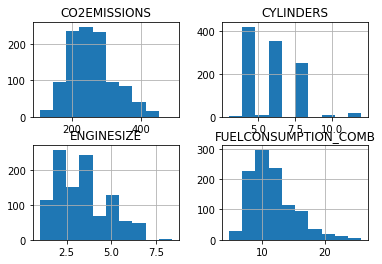

In [0]:
cdf.hist()

Check if there is a linear relation between feature vs CO2Emission

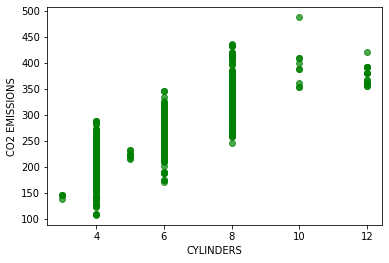

In [0]:
plt.scatter(cdf['CYLINDERS'], cdf['CO2EMISSIONS'], marker= 'o', alpha=0.7, color = 'green')
plt.xlabel('CYLINDERS')
plt.ylabel('CO2 EMISSIONS')
plt.show()

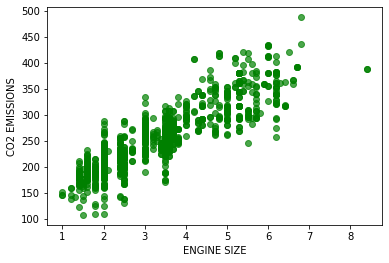

In [0]:
plt.scatter(cdf['ENGINESIZE'], cdf['CO2EMISSIONS'], marker= 'o', alpha=0.7, color = 'green')
plt.xlabel('ENGINE SIZE')
plt.ylabel('CO2 EMISSIONS')
plt.show()

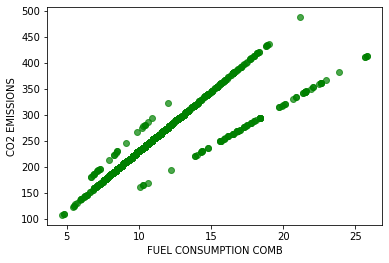

In [0]:
plt.scatter(cdf['FUELCONSUMPTION_COMB'], cdf['CO2EMISSIONS'], marker= 'o', alpha=0.7, color = 'green')
plt.xlabel('FUEL CONSUMPTION COMB')
plt.ylabel('CO2 EMISSIONS')
plt.show()

### Data preprocessing

It's not necessary to use scalers because the there is only one feature.

y = a* Feature_1 + b

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df[['CYLINDERS']], df[['CO2EMISSIONS']],test_size = 0.3)

### Model

In [0]:
lr = LinearRegression()

In [0]:
lr.fit(X_train, y_train)
y_hat = lr.predict(X_test)

### Model output check

In [0]:
print('Coef: {}'.format(lr.coef_))
print('Intercep: {}'.format(lr.intercept_))

Coef: [[30.77147642]]
Intercep: [77.75426129]


So, our linear regression can be written as:
    
    y = 30.77 * (CILINDERS) + 77.75


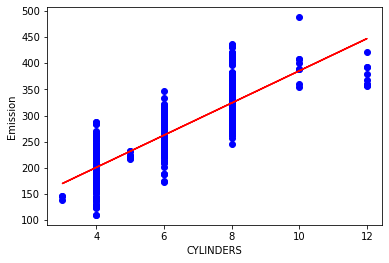

In [0]:
_ = plt.scatter(X_train['CYLINDERS'], y_train['CO2EMISSIONS'],  color='blue')
_ = plt.plot(X_train, lr.coef_[0][0]*X_train + lr.intercept_[0], '-r')
_ = plt.xlabel("CYLINDERS")
_ = plt.ylabel("Emission")

### Evaluation

we compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:

     

*   Mean absolute error: It is the mean of the absolute value of the errors.This is the easiest of the metrics to understand since it’s just average error.
*   Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.
*   Root Mean Squared Error (RMSE): This is the square root of the Mean Square Error.
*   R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).


In [0]:
from sklearn.metrics import r2_score

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_hat , y_test) )

Mean absolute error: 24.80
Residual sum of squares (MSE): 1049.36
R2-score: 0.67
